In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Begin by reading in 610 person movies rating dataset
df = pd.read_csv('ml-latest-small/ratings.csv')
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
movie_titles = pd.read_csv('ml-latest-small/movies.csv')
movie_titles.head()


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
df['movieId'] = pd.to_numeric(df['movieId'])

movie_titles['movieId'] = pd.to_numeric(movie_titles['movieId'])

merged = pd.merge(df, movie_titles, on='movieId', how='left')

In [5]:
merged.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [6]:
#Gets how many reviews each movie has
ratings = pd.DataFrame(merged.groupby('title')['rating'].mean())
ratings['number_of_ratings'] = merged.groupby('title')['rating'].count()
ratings.head()

,rating,number_of_ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


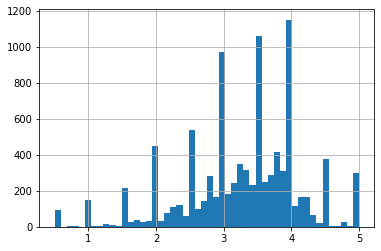

In [7]:
#Average star ratings across movies in dataset
%matplotlib inline
ratings['rating'].hist(bins=50)

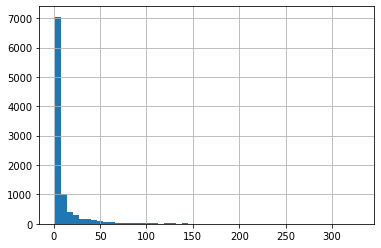

In [8]:
#Number of Reviews across movies in dataset
ratings['number_of_ratings'].hist(bins=50)

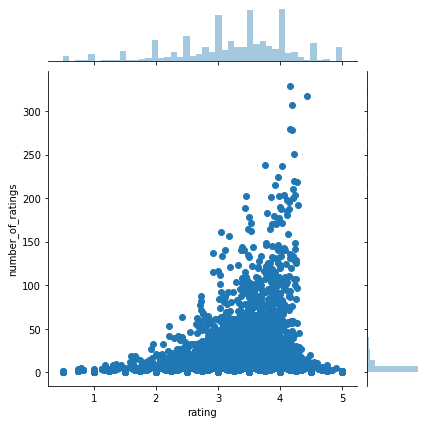

In [9]:
#Number of reviews of each class
sns.jointplot(x='rating', y='number_of_ratings', data=ratings)



In [10]:
movie_matrix = merged.pivot_table(index='userId', columns='title', values='rating')
movie_matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
ratings.sort_values('rating', ascending=True).head(10)

,rating,number_of_ratings
title,,
Rust and Bone (De rouille et d'os) (2012),0.5,1
The Emoji Movie (2017),0.5,1
The Butterfly Effect 3: Revelations (2009),0.5,1
"Follow Me, Boys! (1966)",0.5,1
The Beast of Hollow Mountain (1956),0.5,1
Dead of Night (1945),0.5,1
Maria Bamford: The Special Special Special! (2012),0.5,1
"Haunted House 2, A (2014)",0.5,1
Midnight Chronicles (2009),0.5,1


In [28]:

movie_pick = input("Enter a movie you enjoyed : ")


Enter a movie you enjoyed :  Pretty Woman (1990)


In [29]:
print(movie_pick)
user_rating = movie_matrix[movie_pick]

user_rating.head()

Pretty Woman (1990)


userId
1    NaN
2    NaN
3    NaN
4    NaN
5    3.0
Name: Pretty Woman (1990), dtype: float64

In [30]:
#find movies that received similar reviews from similar users
similar_to=movie_matrix.corrwith(user_rating)

corr_movie = pd.DataFrame(similar_to, columns=['correlation'])
corr_movie.dropna(inplace=True)
corr_movie.head(5)


,correlation
title,
"'burbs, The (1989)",0.472546
(500) Days of Summer (2009),0.409127
10 Cent Pistol (2015),-1.000000
10 Items or Less (2006),-1.000000
10 Things I Hate About You (1999),0.621919


In [31]:
result = corr_movie.sort_values(['correlation'], ascending=[0])

result.head(5)

,correlation
title,
Triumph of the Will (Triumph des Willens) (1934),1.0
Doubt (2008),1.0
Extremely Loud and Incredibly Close (2011),1.0
Mr. Wonderful (1993),1.0
Mr. Woodcock (2007),1.0


In [32]:
#KNN Model
import io  # needed because of weird encoding of u.item file

from surprise import KNNBaseline
from surprise import Dataset
from surprise import get_dataset_dir


def read_item_names():
    """Read the u.item file from MovieLens 100-k dataset and return two
    mappings to convert raw ids into movie names and movie names into raw ids.
    """

    file_name = get_dataset_dir() + '/ml-100k/ml-100k/u.item'
    rid_to_name = {}
    name_to_rid = {}
    with io.open(file_name, 'r', encoding='ISO-8859-1') as f:
        for line in f:
            line = line.split('|')
            rid_to_name[line[0]] = line[1]
            name_to_rid[line[1]] = line[0]

    return rid_to_name, name_to_rid


# First, train the algortihm to compute the similarities between items
data = Dataset.load_builtin('ml-100k')
trainset = data.build_full_trainset()
sim_options = {'name': 'pearson_baseline', 'user_based': False}
algo = KNNBaseline(sim_options=sim_options)
algo.fit(trainset)

# Read the mappings raw id <-> movie name
rid_to_name, name_to_rid = read_item_names()

#Get a movie for analysis
movie_pick = input("Enter a movie to get nearest neighbours : ")

# Retrieve inner id of the movie 
movie_raw_id = name_to_rid[movie_pick]
movie_inner_id = algo.trainset.to_inner_iid(movie_raw_id)

# Retrieve inner ids of the nearest neighbors of Toy Story.
movie_neighbors = algo.get_neighbors(movie_inner_id, k=10)

# Convert inner ids of the neighbors into names.
movie_neighbors = (algo.trainset.to_raw_iid(inner_id)
                       for inner_id in movie_neighbors)
movie_neighbors = (rid_to_name[rid]
                       for rid in movie_neighbors)

print()
print('The 10 nearest neighbors of ' + str(movie_pick) + ' are:')
for movie in movie_neighbors:
    print(movie)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


Enter a movie to get nearest neighbours :  Pretty Woman (1990)



The 10 nearest neighbors of Pretty Woman (1990) are:
Top Gun (1986)
Dirty Dancing (1987)
Ghost (1990)
While You Were Sleeping (1995)
Back to the Future (1985)
Speed (1994)
True Lies (1994)
Braveheart (1995)
Firm, The (1993)
Sleepless in Seattle (1993)


In [43]:
#Part B: SVD Model

"\nimport surprise\nfrom surprise import SVD\nfrom surprise import Dataset\nfrom surprise import accuracy\nfrom surprise.model_selection import train_test_split\n\n# Load the movielens-100k dataset (download it if needed),\ndata = Dataset.load_builtin('ml-100k')\n\n# sample random trainset and testset\n# test set is made of 25% of the ratings.\ntrainset, testset = train_test_split(data, test_size=.25)\n\n# We'll use the famous SVD algorithm.\n#algo = SVD()\nalgo = surprise.SVD(random_state=0, n_factors=200, n_epochs=30, verbose=True)\n\n# Train the algorithm on the trainset, and predict ratings for the testset\nalgo.fit(trainset)\npredictions = algo.test(testset)\n\n# Then compute RMSE\naccuracy.rmse(predictions)\n"

In [33]:
from collections import defaultdict
from surprise import SVD
from surprise import Dataset


def get_top_n(predictions, n=10):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n


# First train an SVD algorithm on the movielens dataset.
data = Dataset.load_builtin('ml-100k')
trainset = data.build_full_trainset()
algo = SVD(random_state=0, n_factors=200, n_epochs=30, verbose=True)
algo.fit(trainset)

# Than predict ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_anti_testset()
predictions = algo.test(testset)

top_n = get_top_n(predictions, n=10)

# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
196 ['64', '318', '357', '169', '178', '134', '187', '317', '98', '427']
186 ['133', '923', '59', '604', '253', '498', '357', '316', '57', '97']
22 ['98', '100', '169', '357', '12', '478', '489', '22', '223', '525']
244 ['474', '98', '496', '127', '269', '523', '483', '14', '132', '1449']
166 ['50', '174', '69', '265', '498', '237', '172', '223', '181', '603']
298 ['64', '216', '313', '478', '515', '12', '9

In [34]:
from collections import defaultdict

from surprise import Dataset
from surprise import SVD
from surprise.model_selection import KFold


def precision_recall_at_k(predictions, k=10, threshold=3.5):
    '''Return precision and recall at k metrics for each user.'''

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    return precisions, recalls


data = Dataset.load_builtin('ml-100k')
kf = KFold(n_splits=5)
algo = SVD()

for trainset, testset in kf.split(data):
    algo.fit(trainset)
    predictions = algo.test(testset)
    precisions, recalls = precision_recall_at_k(predictions, k=5, threshold=4)

    # Precision and recall can then be averaged over all users
    print("Precision Scores for K-Fold Validation")
    print(sum(prec for prec in precisions.values()) / len(precisions))
    print("Recall Scores for K-Fold Validation")
    print(sum(rec for rec in recalls.values()) / len(recalls))

Precision Scores for K-Fold Validation
0.8797947629157817
Recall Scores for K-Fold Validation
0.24992042004168052
Precision Scores for K-Fold Validation
0.8940261576528808
Recall Scores for K-Fold Validation
0.2688174309661094
Precision Scores for K-Fold Validation
0.8665252739483909
Recall Scores for K-Fold Validation
0.25443191551515393
Precision Scores for K-Fold Validation
0.8904989384288743
Recall Scores for K-Fold Validation
0.2572342590360556
Precision Scores for K-Fold Validation
0.8633545873184553
Recall Scores for K-Fold Validation
0.25035333998847503
